In [1]:
!pip install librosa

In [2]:
from glob import glob
audio_files = glob('/kaggle/input/ravdess-emotional-speech-audio/**/*.wav', recursive=True)
print(len(audio_files))

2880


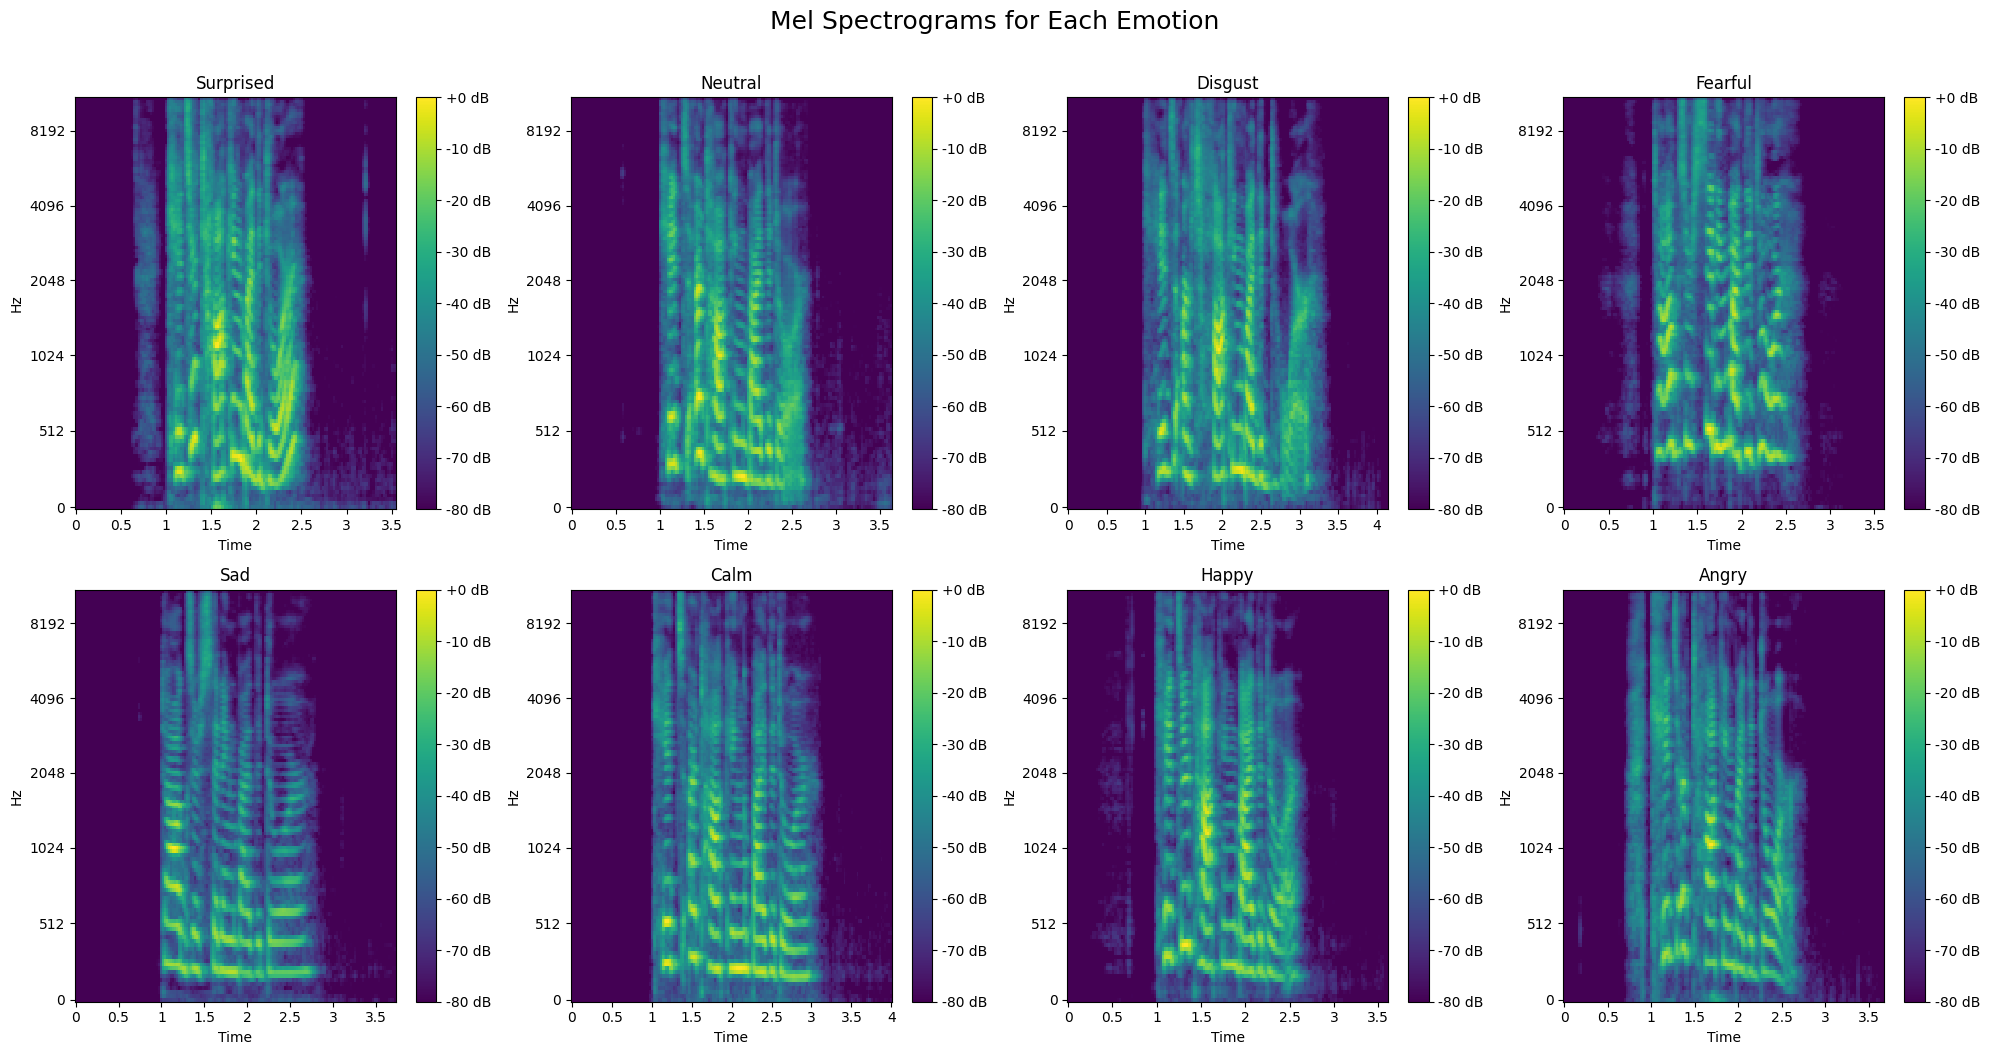

In [3]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
emotion_dict = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

def extract_emotion(filepath):
    filename = os.path.basename(filepath)
    emotion_code = filename.split("-")[2]
    return emotion_dict.get(emotion_code, "unknown")

# 4. Collect one sample per emotion
emotion_samples = {}
for file in audio_files:
    emotion = extract_emotion(file)
    if emotion not in emotion_samples:
        emotion_samples[emotion] = file
    if len(emotion_samples) == len(emotion_dict):
        break

plt.figure(figsize=(20, 10))
for i, (emotion, file) in enumerate(emotion_samples.items()):
    y, sr = librosa.load(file)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.subplot(2, 4, i + 1)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.title(emotion.capitalize())
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

plt.suptitle("Mel Spectrograms for Each Emotion", fontsize=18, y=1.05)
plt.show()

In [4]:
def plot_waveform_by_emotion(file_path):
    y, sr = librosa.load(file_path)
    emotion = extract_emotion(file_path)

    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {emotion.capitalize()}", fontsize=16)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

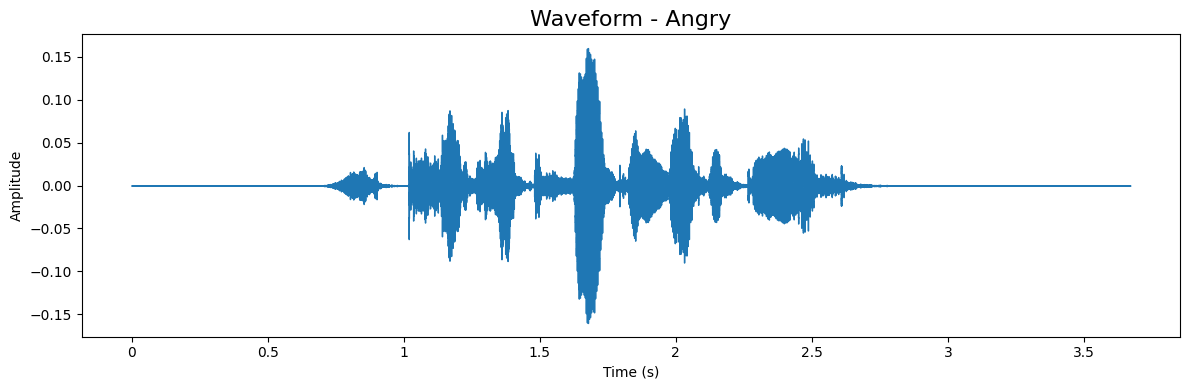

In [5]:
for file in audio_files:
    if extract_emotion(file) == 'angry':
        plot_waveform_by_emotion(file)
        break

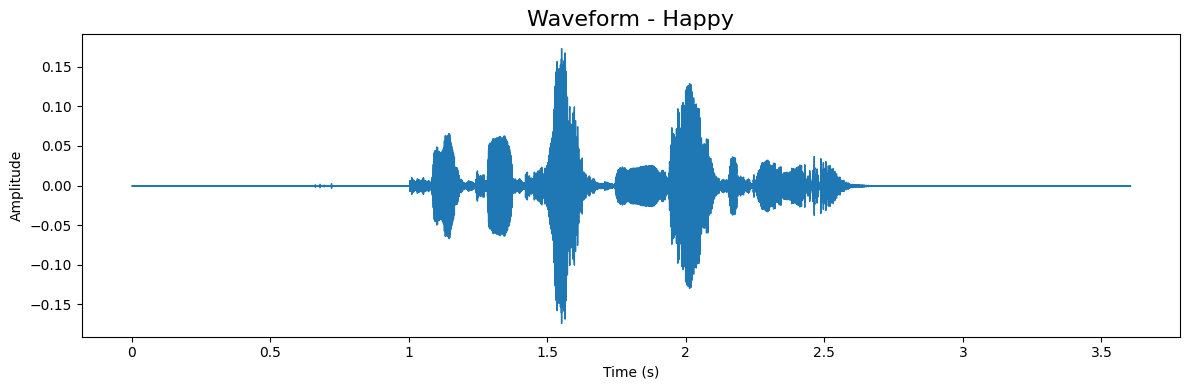

In [6]:
for file in audio_files:
    if extract_emotion(file) == 'happy':
        plot_waveform_by_emotion(file)
        break

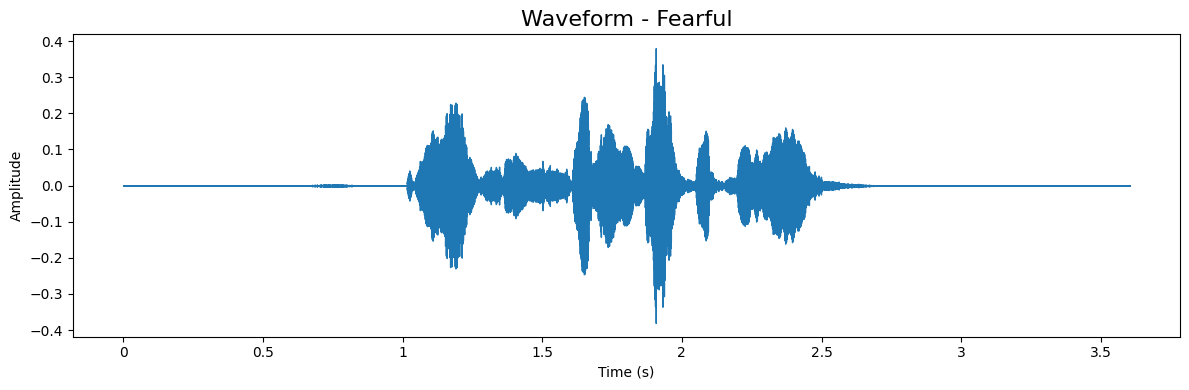

In [7]:
for file in audio_files:
    if extract_emotion(file) == 'fearful':
        plot_waveform_by_emotion(file)
        break

In [8]:
from IPython.display import Audio, display
label_to_code = {v: k for k, v in emotion_dict.items()}
def play_emotion_librosa(emotion_name):
    emotion_code = label_to_code.get(emotion_name.lower())
    if not emotion_code:
        print(f"❌ Emotion not found. Try one of: {list(label_to_code.keys())}")
        return

    for file in audio_files:
        if f"-{emotion_code}-" in os.path.basename(file):
            y, sr = librosa.load(file, sr=None) 
            print(f"🎧 Playing ({emotion_name}) from file: {os.path.basename(file)}")
            display(Audio(y, rate=sr))
            return

    print(f"⚠️ No audio file found for emotion: {emotion_name}")
play_emotion_librosa("happy")

🎧 Playing (happy) from file: 03-01-03-01-01-01-02.wav


In [9]:
import librosa
import numpy as np

def extract_audio_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)

    return {
        'mfcc': mfcc,
        'chroma': chroma,
        'zcr': zcr,
        'centroid': spec_centroid,
        'rms': rms,
        'sr': sr,
        'y': y
    }
extract_audio_features("/kaggle/input/ravdess-emotional-speech-audio/Actor_04/03-01-01-01-02-01-04.wav")

{'mfcc': array([[-8.7558325e+02, -8.7558325e+02, -8.7558325e+02, ...,
         -8.7319934e+02, -8.6690930e+02, -8.6997766e+02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          3.2860572e+00,  1.1976857e+01,  7.7464280e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          3.0482659e+00,  1.1130251e+01,  7.2168221e+00],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -8.1000471e-01, -2.4849503e+00, -1.6079261e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -1.0919131e+00, -3.2265368e+00, -2.1587839e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -1.2859597e+00, -3.5541530e+00, -2.4491608e+00]], dtype=float32),
 'chroma': array([[0.        , 0.        , 0.        , ..., 0.51054716, 0.7727806 ,
         0.77424437],
        [0.        , 0.        , 0.        , ..., 0.37750357, 0.67485374,
         0.69568557],
        [0.        , 0.        , 0.     

/tmp/ipykernel_212/167041793.py:21: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


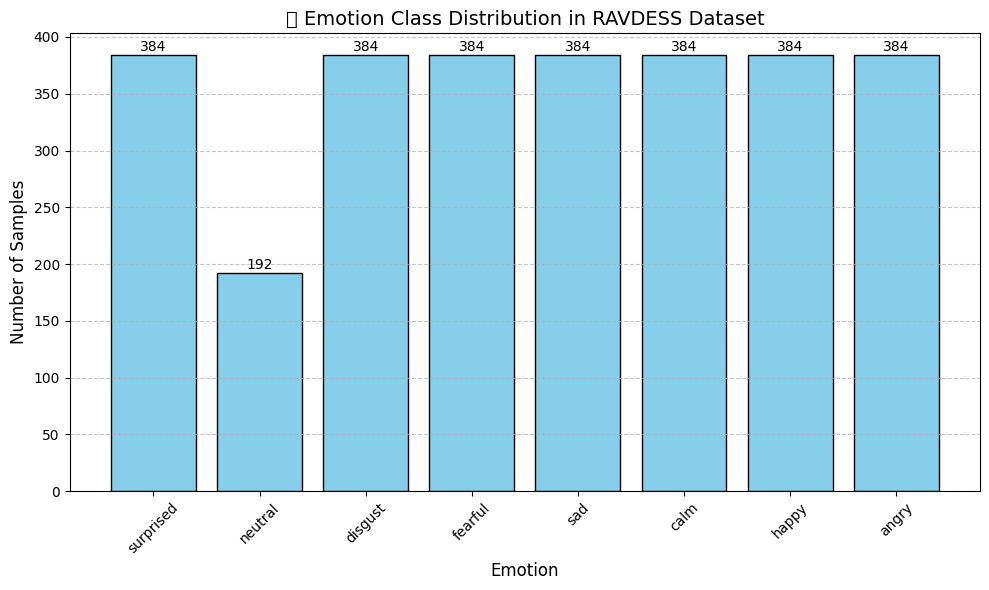

In [10]:
from collections import Counter
emotion_counts = Counter([extract_emotion(file) for file in audio_files])

emotions = list(emotion_counts.keys())
counts = list(emotion_counts.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(emotions, counts, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, str(height), ha='center', va='bottom')

plt.title("🎭 Emotion Class Distribution in RAVDESS Dataset", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
!pip install audiomentations

Original sample:


Augmented sample:


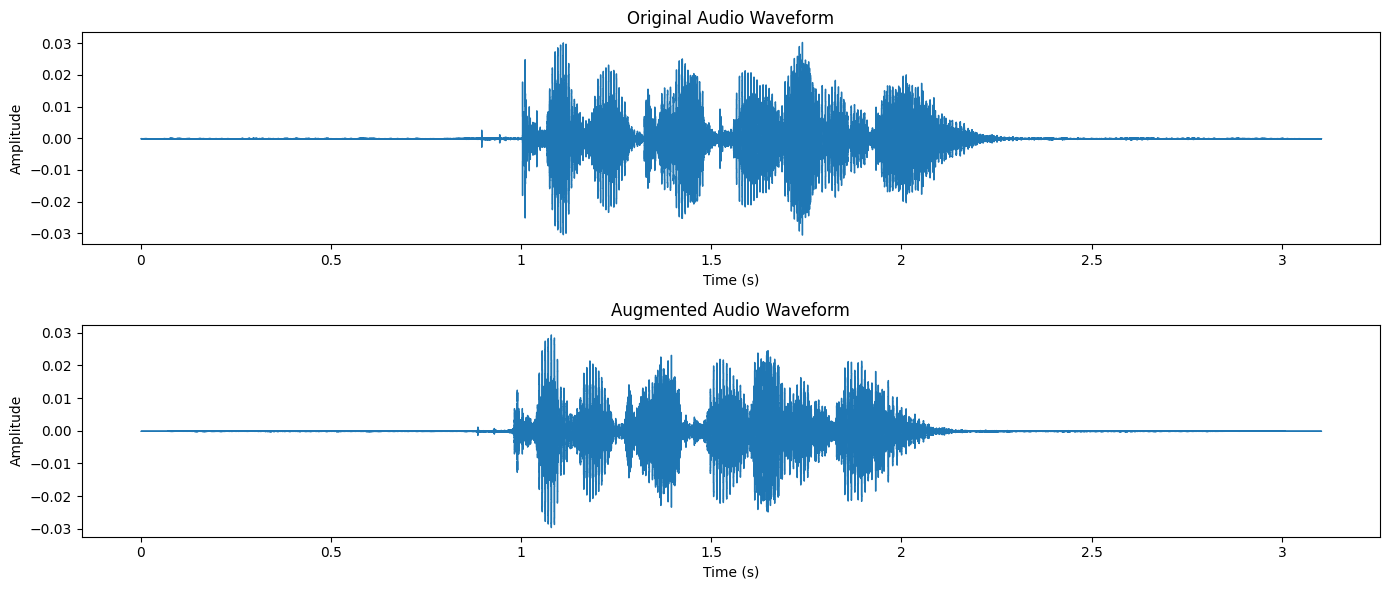

In [12]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import random
from audiomentations import Compose, TimeStretch,  AddGaussianNoise,PitchShift, Shift
import soundfile as sf
import IPython.display as ipd

# Define augmentations (light + natural)
augmentation_pipeline = Compose([
    TimeStretch(min_rate=0.9, max_rate=1.1, p=1.0),
    PitchShift(min_semitones=-2, max_semitones=2, p=1.0),
    Shift(min_shift=-0.1, max_shift=0.1, p=1.0)
])

# Filter for neutral emotion files (adjust if needed)
neutral_files = [file for file in audio_files if "01" in file]

# Pick one file
original_file = random.choice(neutral_files)
y_original, sr = librosa.load(original_file)

# Apply augmentation
y_augmented = augmentation_pipeline(samples=y_original, sample_rate=sr)

# Save augmented sample
augmented_audio_path = "augmented_sample.wav"
sf.write(augmented_audio_path, y_augmented, sr)

# 🔊 Play audio
print("Original sample:")
ipd.display(ipd.Audio(y_original, rate=sr))
print("Augmented sample:")
ipd.display(ipd.Audio(y_augmented, rate=sr))

# 📈 Plotting waveforms
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y_original, sr=sr)
plt.title("Original Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_augmented, sr=sr)
plt.title("Augmented Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [13]:
import os
import pandas as pd
import librosa
import numpy as np
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import soundfile as sf
import uuid 
dataset_path = "/kaggle/input/ravdess-emotional-speech-audio"

emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

file_paths = []
labels = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):
            emotion_code = file.split("-")[2]
            emotion = emotion_map.get(emotion_code)
            if emotion:
                file_paths.append(os.path.join(root, file))
                labels.append(emotion)

df = pd.DataFrame({'path': file_paths, 'label': labels})
print(df.head())
print("\n✅ Total original samples:", len(df))

augment = Compose([
    TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
    Shift(min_shift=-0.1, max_shift=0.1, p=0.5)
])

neutral_df = df[df['label'] == 'neutral']
augmented_dir = "/kaggle/working/augmented_neutral"
os.makedirs(augmented_dir, exist_ok=True)

aug_paths = []
aug_labels = []

print("\n🚀 Augmenting neutral samples...")

for i, row in neutral_df.iterrows():
    path = row['path']
    try:
        y, sr = librosa.load(path, sr=None)
        y_aug = augment(samples=y, sample_rate=sr)
        aug_filename = f"neutral_aug_{uuid.uuid4().hex[:8]}.wav"
        aug_path = os.path.join(augmented_dir, aug_filename)
        sf.write(aug_path, y_aug, sr)
        aug_paths.append(aug_path)
        aug_labels.append('neutral')
    except Exception as e:
        print(f"⚠️ Skipped {path}: {e}")


df_aug = pd.DataFrame({'path': aug_paths, 'label': aug_labels})
df_combined = pd.concat([df, df_aug], ignore_index=True)

print("\n✅ Total samples after augmentation:", len(df_combined))
print(df_combined['label'].value_counts())


                                                path      label
0  /kaggle/input/ravdess-emotional-speech-audio/A...  surprised
1  /kaggle/input/ravdess-emotional-speech-audio/A...    neutral
2  /kaggle/input/ravdess-emotional-speech-audio/A...    disgust
3  /kaggle/input/ravdess-emotional-speech-audio/A...    disgust
4  /kaggle/input/ravdess-emotional-speech-audio/A...    neutral

✅ Total original samples: 2880

🚀 Augmenting neutral samples...

✅ Total samples after augmentation: 3072
label
surprised    384
neutral      384
disgust      384
fearful      384
sad          384
calm         384
happy        384
angry        384
Name: count, dtype: int64


In [14]:
import librosa
import numpy as np
from tqdm import tqdm

# Feature extraction function
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)

        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        rms = librosa.feature.rms(y=y)

        features = np.hstack([
            np.mean(mfcc, axis=1),         # 13
            np.mean(chroma, axis=1),       # 12
            np.mean(centroid),             # 1
            np.mean(zcr),                  # 1
            np.mean(rms)                   # 1
        ])
        return features
    except Exception as e:
        print(f"❌ Error with {file_path}: {e}")
        return None

# Extract features from DataFrame
X = []
y = []

print("🔍 Extracting features from DataFrame...")
for _, row in tqdm(df_combined.iterrows(), total=len(df_combined)):
    file_path = row['path']
    label = row['label']
    features = extract_features(file_path)
    if features is not None:
        X.append(features)
        y.append(label)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("✅ Done!")
print("📐 Feature shape:", X.shape)
print("🔖 Label shape:", y.shape)


🔍 Extracting features from DataFrame...


100%|██████████| 3072/3072 [03:17<00:00, 15.55it/s]

✅ Done!
📐 Feature shape: (3072, 28)
🔖 Label shape: (3072,)


In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_encoded = label_encoder.fit_transform(y)

# Check the encoding result
print("Original labels:", y[:10])
print("Encoded labels:", y_encoded[:10])
class_names = label_encoder.classes_
print("Class names with encoded labels:")
for i, class_name in enumerate(class_names):
    print(f"Encoded label {i}: {class_name}")


Original labels: ['surprised' 'neutral' 'disgust' 'disgust' 'neutral' 'fearful' 'sad'
 'neutral' 'calm' 'happy']
Encoded labels: [7 5 2 2 5 3 6 5 1 4]
Class names with encoded labels:
Encoded label 0: angry
Encoded label 1: calm
Encoded label 2: disgust
Encoded label 3: fearful
Encoded label 4: happy
Encoded label 5: neutral
Encoded label 6: sad
Encoded label 7: surprised


In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the feature set
X_normalized = scaler.fit_transform(X)



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred)*100)
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 93.65853658536587
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94        77
           1       0.89      0.95      0.92        76
           2       0.90      0.97      0.94        77
           3       0.95      0.92      0.93        77
           4       1.00      0.90      0.95        77
           5       0.95      0.96      0.95        77
           6       0.97      0.92      0.95        77
           7       0.95      0.90      0.92        77

    accuracy                           0.94       615
   macro avg       0.94      0.94      0.94       615
weighted avg       0.94      0.94      0.94       615



In [19]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy and report
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))


XGBoost Accuracy: 91.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        77
           1       0.90      0.95      0.92        76
           2       0.95      0.92      0.93        77
           3       0.94      0.87      0.91        77
           4       0.89      0.87      0.88        77
           5       0.92      0.95      0.94        77
           6       0.92      0.90      0.91        77
           7       0.90      0.92      0.91        77

    accuracy                           0.92       615
   macro avg       0.92      0.92      0.92       615
weighted avg       0.92      0.92      0.92       615



In [38]:
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('svm', SVC(kernel='rbf', probability=True))
])
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid.fit(X_train, y_train)

print(f"Best score: {grid.best_score_}")
print(f"Best params: {grid.best_params_}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   1.2s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   1.2s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   1.2s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   1.3s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   1.3s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   1.3s
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time=   1.3s
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time=   1.3s
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time=   1.3s
[CV] END ..........................svm__C=1, svm__gamma=0.01; total time=   1.0s
[CV] END ..........................svm__C=1, svm__gamma=0.01; total time=   1.0s
[CV] END ..........................svm__C=1, svm

In [41]:
best_svm = SVC(kernel='rbf', C=100, gamma=0.1, probability=True)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9463414634146341
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        77
           1       1.00      0.97      0.99        76
           2       0.95      0.95      0.95        77
           3       0.88      0.92      0.90        77
           4       0.97      0.87      0.92        77
           5       0.95      0.99      0.97        77
           6       0.96      0.95      0.95        77
           7       0.92      0.95      0.94        77

    accuracy                           0.95       615
   macro avg       0.95      0.95      0.95       615
weighted avg       0.95      0.95      0.95       615



In [47]:
file_path = "/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav"  

features = extract_features(file_path)
features = features.reshape(1, -1) 
features_scaled = scaler.transform(features)

if features is not None:
    # --- Predictions with each model ---
    rf_pred = clf.predict(features_scaled)
    svm_pred = best_svm.predict(features_scaled)
    xgb_pred = xgb_model.predict(features_scaled)

    print(f"Random Forest Prediction: {rf_pred}")
    print(f"SVM Prediction: {svm_pred}")
    print(f"XGBoost Prediction: {xgb_pred}")
    rf_pred_label = label_encoder.inverse_transform(rf_pred)
    svm_pred_label = label_encoder.inverse_transform(svm_pred)
    xgb_pred_label = label_encoder.inverse_transform(xgb_pred)
    
    # Output the predictions in terms of class names
    print(f"Random Forest Prediction: {rf_pred_label[0]}")
    print(f"SVM Prediction: {svm_pred_label[0]}")
    print(f"XGBoost Prediction: {xgb_pred_label[0]}")
else:
    print("❌ Failed to extract features from the audio.")


Random Forest Prediction: [5]
SVM Prediction: [5]
XGBoost Prediction: [5]
Random Forest Prediction: neutral
SVM Prediction: neutral
XGBoost Prediction: neutral


In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import numpy as np



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to run CV and print results
def evaluate_model_cv(model, name):
    scores = cross_val_score(model, X_normalized, y_encoded, cv=cv, scoring='accuracy')
    print(f"🔍 {name} Cross-Validation Accuracy: {np.mean(scores)*100:.2f}% ± {np.std(scores)*100:.2f}%")
    return scores

# Run for all three
rf_scores = evaluate_model_cv(clf, "Random Forest")
svm_scores = evaluate_model_cv(best_svm, "SVM")
xgb_scores = evaluate_model_cv(xgb_model, "XGBoost")


🔍 Random Forest Cross-Validation Accuracy: 93.00% ± 1.24%
🔍 SVM Cross-Validation Accuracy: 94.27% ± 1.15%
🔍 XGBoost Cross-Validation Accuracy: 92.58% ± 1.04%


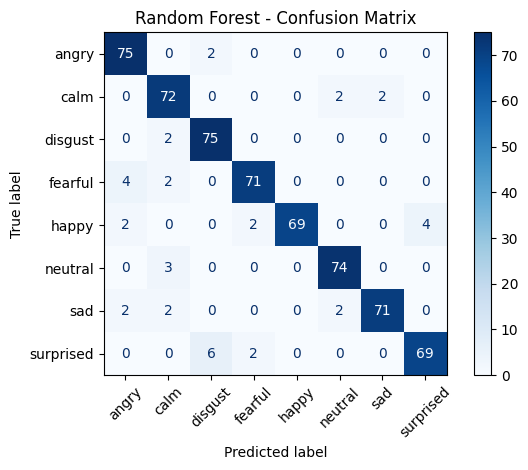

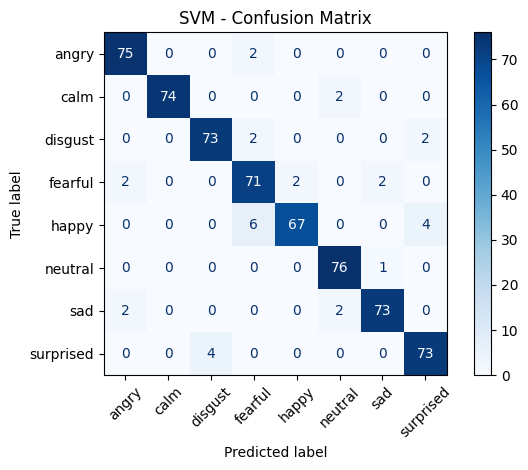

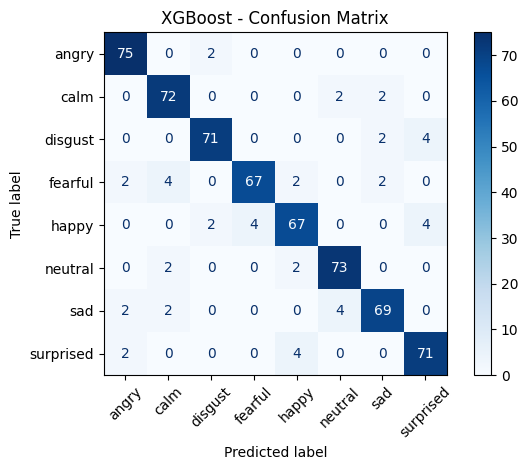

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from each model
y_pred_rf = clf.predict(X_test)
y_pred_svm = best_svm.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Set up labels from your LabelEncoder
class_labels = label_encoder.classes_

# Plot function
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(title)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Random Forest
plot_confusion(y_test, y_pred_rf, "Random Forest - Confusion Matrix")
plot_confusion(y_test, y_pred_svm, "SVM - Confusion Matrix")
plot_confusion(y_test, y_pred_xgb, "XGBoost - Confusion Matrix")

